# Ритейл — Анализ программы лояльности


Любая программа лояльности — это комплексный подход в маркетинге, который включает в себя систему скидок,накопления бонусов за покупки и т.п.Программа лояльности клиентов направлена на увеличение продаж и средней суммы покупок постоянными покупателями.Главная цель- чтобы клиент возвращался снова и снова,совершал чаще и больше покупок  и приносл тем самым прибыль компании.В нашем случае стоит обратить внимание на такие метрики: размер среднего чека и общую  выручку, которую приносят покупатели  за рассматриваемый период времени.По изменению этих метрик и стоит судить об успехе программы лояльности.


**Цели  проекта**

  - Заказчик : менеджер проекта, который отвечает за программу лояльности

  - Менеджер проекта хочет оценить результаты внедрения программы лояльности, понять насколько 
    сработала программа лояльности, стоит ли ее использовать дальше.Есть ли возможности для ее улучшения?

  - Нужно проверить : повышаются ли основные показатели у клиентов, входящих в программу лояльности

  - Рассматриваемый период времени :  **с 1 декабря 2016 года по 28 февраля 2017 года**

  - Прчины необходимости провести исследования: после внедрения программы лояльности важно понять действительно ли она    
    показывает ожидаемый рост ключевых ритейл-метрик. Результаты исследования будут говорить о результатах внедрения программы.

  - Проводили ли ранее такие исследования: это новый вид исследования.


**Описание данных:**

Датасет содержит данные о покупках в магазине строительных материалов «Строили, строили и наконец построили». Все покупатели могут получить доступ в магазин с использованием персональных карт. За 200 рублей в месяц они могут стать участниками программы лояльности. В программу включены скидки, специальные предложения, подарки.


**Файл retail_dataset.csv:**

- `purchaseId` — id чека;
- `item_ID` — id товара;
- `purchasedate` — дата покупки;
- `Quantity` — количество товара;
- `CustomerID` — id покупателя;
- `ShopID` — id магазина;
- `loyalty_program` — участвует ли покупатель в программе лояльности;

**Файл product_codes.csv:**

- `productID` — id товара;
- `price_per_one` — стоимость одной единицы товара


**Задачи проекта:**
- провести исследовательский анализ данных показать общую картину;
- получить основные ритейл-метрики по когортам у клиентов внутри программы лояльности и вне ее;
- проанализировать насколько сработала текущая программа лояльности;

- если программа не слишком эффективна, то возможно, предложить способы повышения
  эффективности, обосновать использование других программ лояльности;

- если программа достаточно эффективна, то возможно, сказать каких еще клиентов стоит
  подключить к программе лояльности в первую очередь;

- Сформулировать и проверить гипотезы;

**План :**

Шаг 1. Загрузка библиотек и знакомство с данными 
  - Загрузка библиотек
  - Загрузка данных.Получение общей информации.

Шаг 2.Предобработка данных
  - Переименование столбцов
  - Проверка на дубликаты
  - Обработка пропусков  
  - Приведение данных к нужным типам
  - Объединение таблиц,добавление столбца с суммой чека 
  - Промежуточные выводы
  
Шаг 3. Исследовательский анализ данных.

  - Сколько клиентов принимает участие в программе лояльности?
  - За какой временной период предоставлены данные?Есть ли сезонность? 
  - Как много представлено наименований товара в магазинах?
  - Анализ данных столбца Quantity — количество товара.Аномальные значения и выбросы.
  - Анализ цен на товары
  - Какие магазины участвуют в программе лояльности?
  - Промежуточные выводы
  
Шаг 4.Анализ программы лояльности 

  - Расчет среднего чека для участников программы лояльности и не участвующих в ней покупателей
  - Расчет среднего количества товарных позиций в чеке на участников программы и других покупателей
  - Расчет среднего числа покупок на одного клиента для участников программы лояльности и не               участвующих в ней покупателей
  - Графики среднего чека в в зависимости от времени с разбивкой на две категории (с картой лояльности     и без нее)
  - Графики среднего количества единиц товара в чеке в день и месяц с разбивкой на две категории (с картой лояльности и без нее)
  - Графики куммулятивной выручки в разбивке по группам покупателей
  - Расчет LTV и построение графиков
  - Промежуточные выводы
  
Шаг 5. Проверка статистических гипотез

  - 1.Проверка гипотезы: Средний чек участников программы лояльности отличается от чека остальных покупателей
   
  - 2.Проверка гипотезы: Среднее число товаров чеке не зависит от участия в программе лояльности
  
Шаг 6. Выводы и рекомендации


Шаг 7.Подготовка презентациии по итогам исследования.

Шаг 8.Построение дашборда

## Шаг 1. Загрузка и предобработка данных

In [1]:

#импортируем бибилиотеки
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

import seaborn as sns


import plotly.express as px
from plotly import graph_objects as go

from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

import datetime as dt
from datetime import datetime,timedelta
import math


import warnings
warnings.filterwarnings("ignore")

In [2]:
#загрузка данных
try:
    retail_df = pd.read_csv('retail_dataset.csv')
    product_df = pd.read_csv('product_codes.csv')
except:
    retail_df = pd.read_csv('/datasets/retail_dataset.csv')
    product_df = pd.read_csv('/datasets/product_codes.csv')

Функция для знакомства с данными

In [3]:


def inform(df):
    display(df.head()) # вывод первых 5 строк таблицы
    df.info() # получение информации
    print ('Количество дубликатов -', df.duplicated().sum()) # проверка на дубликаты
    print ('Число пропусков -',df.isna().sum())# число пропусков
    display(df.describe()) #описательные статистики
    return df

Датасет retail_df

In [4]:
retail_df = inform(retail_df)

,purchaseid,item_ID,Quantity,purchasedate,CustomerID,ShopID,loyalty_program
0,538280,21873,11,2016-12-10 12:50:00,18427.0,Shop 0,0.0
1,538862,22195,0,2016-12-14 14:11:00,22389.0,Shop 0,1.0
2,538855,21239,7,2016-12-14 13:50:00,22182.0,Shop 0,1.0
3,543543,22271,0,2017-02-09 15:33:00,23522.0,Shop 0,1.0
4,543812,79321,0,2017-02-13 14:40:00,23151.0,Shop 0,1.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105335 entries, 0 to 105334
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   purchaseid       105335 non-null  object 
 1   item_ID          105335 non-null  object 
 2   Quantity         105335 non-null  int64  
 3   purchasedate     105335 non-null  object 
 4   CustomerID       69125 non-null   float64
 5   ShopID           105335 non-null  object 
 6   loyalty_program  105335 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 5.6+ MB
Количество дубликатов - 1033
Число пропусков - purchaseid             0
item_ID                0
Quantity               0
purchasedate           0
CustomerID         36210
ShopID                 0
loyalty_program        0
dtype: int64


,Quantity,CustomerID,loyalty_program
count,105335.000000,69125.000000,105335.000000
mean,7.821218,21019.302047,0.226345
std,327.946695,1765.444679,0.418467
min,-74216.000000,18025.000000,0.000000
25%,0.000000,19544.000000,0.000000
50%,2.000000,20990.000000,0.000000
75%,7.000000,22659.000000,0.000000
max,74214.000000,23962.000000,1.000000


Датасет product_df

In [5]:
product_df= inform(product_df)

,productID,price_per_one
0,85123A,2.55
1,71053,3.39
2,84406B,2.75
3,84029G,3.39
4,84029E,3.39


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9969 entries, 0 to 9968
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   productID      9969 non-null   object 
 1   price_per_one  9969 non-null   float64
dtypes: float64(1), object(1)
memory usage: 155.9+ KB
Количество дубликатов - 0
Число пропусков - productID        0
price_per_one    0
dtype: int64


,price_per_one
count,9969.000000
mean,19.503697
std,330.880754
min,0.000000
25%,1.250000
50%,2.550000
75%,5.510000
max,16888.020000


### **ВЫВОДЫ по шагу 1:**
    
`Таблица retail_df`

- В таблице 7 столбцов и 105335 строк. Каждая сторока содержит данные об одной покупке: какой товар,когда и в каком количестве был куплен.Указан ID покупателя, который его купил, чек, в который входил этот от товар,а также информация о том, участвует ли покупатель в программе лояльности.

- Названия столбцов не соответствуют общепринятому виду.Следует привести их к нижнему регистру и единому стилю. 

- Есть пропуски в столбце `CustomerID`- 36210.Нужно определить причину.этого.

- Количество дубликатов - 1033.Чуть позже определимся на их счет.

- В столбце `purchasedate` данные имеют тип `object`- его следует заменить на  `datetime`.А в столбцах `CustomerID` и `loyalty_program`  тип `float` следует  поменять на  `int` .

- В столбце `Quantity` видно, что есть отрицательные значения - также стоит понять,что это значит.


`Таблица product_df`

- Содержит 9969 записей  о товарах и их стоимости.Где `productID` — id товара ,а `price_per_one` — стоимость одной единицы товара
- Пропусков и дубликатов не обнаружено

- Типы данных соответствуют природе

- Названия столбцов также следует привести  к нижнему регистру и единому стилю. 

## Шаг 2.Предобработка данных

### Переименование столбцов 

**В датасете retail_df**

In [6]:
retail_df = retail_df.rename(str.lower, axis='columns')

In [7]:
retail_df = retail_df.rename(columns={'purchaseid': 'purchase_id', 
                                          'purchasedate': 'purchase_date', 
                                          'customerid': 'customer_id',
                                          'shopid': 'shop_id'})
retail_df.columns

Index(['purchase_id', 'item_id', 'quantity', 'purchase_date', 'customer_id',
       'shop_id', 'loyalty_program'],
      dtype='object')

**В датасете product_df**

In [8]:
product_df = product_df.rename(columns={'productID': 'product_id'})
product_df.columns

Index(['product_id', 'price_per_one'], dtype='object')

### Проверка на дубликаты

Как было  установлено выше, в основном датасете  есть полные дубликаты - их 1033.Посмотрим какую долю они составляют от общего числа.
.

In [9]:
print('Доля дубликатов:{:.2%}'.format(retail_df.duplicated().sum()/len(retail_df)))

Доля дубликатов:0.98%


Это немного.Их вполне можно удалить.Хотя,в приироде такое возможно:например  это может быть повторяющаяся строка в чеке с одним и тем же товаром у одного клиента.Удалим их.


In [10]:
retail_df = retail_df.drop_duplicates()
retail_df.duplicated().sum()

0

### Обработка пропусков

Как определено выше есть пропуски в столбце `сustomer_id`- 36210.Посмотрим наглядно какую долю они составляют.

In [11]:
pd.DataFrame(round(retail_df.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
purchase_id,0.000000
item_id,0.000000
quantity,0.000000
purchase_date,0.000000
customer_id,34.700000
shop_id,0.000000
loyalty_program,0.000000


Доля пропусков в `сustomer_id` велика -34.4%.удалять иx нецелесообразно.Эти пропуски,скорее всего, имеют естественную природу.Это могут быть покупатели, которые не имеют карт клиента  и никак не регистрировались в магазине- соответственно и не имеют никакого ID.Посмотрим поподробнее.Проверим,есть ли такие покупатели среди участников программы лояльности.

In [12]:
len(retail_df[(retail_df['customer_id'].isna()) & (retail_df['loyalty_program']==1)])

0

Таких не обнаружено.Посмотрим, а у всех остальных  ID есть или нет?

In [13]:
print('Общее число покупок не по программе лояльности:', len(retail_df[retail_df['loyalty_program']==0]))

Общее число покупок не по программе лояльности: 80890


In [14]:
print('Число покупок, не по программе лояльности без ID:',len(retail_df[(retail_df['customer_id'].isna()) & (retail_df['loyalty_program']==0)]))

Число покупок, не по программе лояльности без ID: 36148


Таким образом у нас все участники программы лояльности и большая часть остальных покупателей имеют информацию о ID.Так как  восстановить такие пропуски не представляется возможным,заполним эти пропуски нулями.

In [15]:
retail_df['customer_id'] = retail_df['customer_id'].fillna(0)

### Приведение данных к нужным типам

In [16]:
retail_df['purchase_date'] = pd.to_datetime(retail_df['purchase_date'], format='%Y-%m-%d %H:%M:%S')
retail_df['customer_id'] = retail_df['customer_id'].astype('int64')
retail_df['loyalty_program'] = retail_df['loyalty_program'].astype('int64')

### Объединение таблиц.Добавление столбца с суммой чека

Прежде, чем приступить к объединению таблиц `retail_df` и `product_df`, посчитаем количество уникальных значений в столбце `product_id` в датасете `product_df`, чтобы понять, соответствует ли одна цена одному товару.

In [17]:
product_df['product_id'].nunique()

3159

Посмотрим на распределение цен


In [18]:
product_df['price_per_one'].describe()

count     9969.000000
mean        19.503697
std        330.880754
min          0.000000
25%          1.250000
50%          2.550000
75%          5.510000
max      16888.020000
Name: price_per_one, dtype: float64

Видно,что в датасете 9969 записей,а уникальных значений товаров значительно меньше-3159.Значит  один товар имеет несколько цен.Цены явно имеют выбросы.Стоит заменить цену продукта на медианное значение(оно сеньше подыержено влиянию выбросов) 

In [19]:
product_df1 = product_df.groupby('product_id')['price_per_one'].median().reset_index()
product_df1.head(5)

,product_id,price_per_one
0,10002,1.63
1,10080,0.85
2,10120,0.21
3,10123C,0.65
4,10124A,0.42


Объеденим таблицы и добавим столбец с суммой чека

In [20]:
df = pd.merge(retail_df,product_df1, how='left',left_on='item_id',right_on='product_id').drop(columns=['product_id'])
df['sum_check'] = df['quantity'] * df['price_per_one']

Посмотрим, что получилось.

In [21]:
df = inform(df)

,purchase_id,item_id,quantity,purchase_date,customer_id,shop_id,loyalty_program,price_per_one,sum_check
0,538280,21873,11,2016-12-10 12:50:00,18427,Shop 0,0,1.63,17.93
1,538862,22195,0,2016-12-14 14:11:00,22389,Shop 0,1,3.29,0.00
2,538855,21239,7,2016-12-14 13:50:00,22182,Shop 0,1,1.63,11.41
3,543543,22271,0,2017-02-09 15:33:00,23522,Shop 0,1,4.37,0.00
4,543812,79321,0,2017-02-13 14:40:00,23151,Shop 0,1,5.75,0.00


<class 'pandas.core.frame.DataFrame'>
Int64Index: 104302 entries, 0 to 104301
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   purchase_id      104302 non-null  object        
 1   item_id          104302 non-null  object        
 2   quantity         104302 non-null  int64         
 3   purchase_date    104302 non-null  datetime64[ns]
 4   customer_id      104302 non-null  int64         
 5   shop_id          104302 non-null  object        
 6   loyalty_program  104302 non-null  int64         
 7   price_per_one    104302 non-null  float64       
 8   sum_check        104302 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 8.0+ MB
Количество дубликатов - 0
Число пропусков - purchase_id        0
item_id            0
quantity           0
purchase_date      0
customer_id        0
shop_id            0
loyalty_program    0
price_per_one      0
sum

,quantity,customer_id,loyalty_program,price_per_one,sum_check
count,104302.000000,104302.000000,104302.000000,104302.000000,104302.000000
mean,7.883003,13729.314874,0.224464,5.299516,19.442020
std,329.565540,10100.257229,0.417231,69.549226,397.044626
min,-74216.000000,0.000000,0.000000,0.000000,-77184.640000
25%,0.000000,0.000000,0.000000,1.650000,0.000000
50%,2.000000,19423.000000,0.000000,3.040000,5.850000
75%,7.000000,21692.000000,0.000000,5.205000,18.810000
max,74214.000000,23962.000000,1.000000,6706.710000,77182.560000


### **ВЫВОДЫ по Шагу 2**


- Названия столбцов приведены общепринятому виду.

- Удалены полные дубликаты.Доля дубликатов составила 0.98%

- Обнаружено, что доля пропусков в `сustomer_id` велика **-34.4%**.Удалять иx нецелесообразно.Эти пропуски,скорее всего, имеют естественную природу.Это могут быть покупатели, которые не имеют карт клиента и никак не регистрировались в магазине- соответственно и не имеют никакого ID.Среди участников программы лояльности таких покупателей не обнаруженои большая часть остальных покупателей имеют информацию о ID.Так как восстановить такие пропуски не представляется возможным эти пропуски заменили на `0`.

- В столбце `purchase_date`  тип данных заменен на `datetime`.А в столбцах `CustomerID` и `loyalty_program` тип `float` заменен на `int`.

- Определено, что один товар имеет несколько цен.Для продаж это нормальное явление.Однако для дальнейшего анализа цену продукта заменили на медианное значение.

- Объеденены таблицы `retail_df` и `product_df`  в один датафрейм.Добавлен столбец  ссуммой чека -  `sum_check`.

## Шаг 3. Исследовательский анализ данных.

### Сколько клиентов принимает участие в программе лояльности?

In [22]:
df_1 = df.groupby('loyalty_program')['customer_id'].nunique().reset_index()
df_1

,loyalty_program,customer_id
0,0,1163
1,1,587


In [23]:
fig = px.pie(df_1, values=df_1['customer_id'].values,  
                names={'0': 'Не участвуют в программе лояльности',
                       '1': 'Участвуют в программе лояльности'},
title='Доля участников программы лояльности среди покупателей')
fig.update_traces(textposition='inside', textinfo='percent+value')

#### **Вывод по шагу 3.1:**
Таким образом В программе лояльности участвует 587(33,5%) покупателей.И 1163(66,5%) не участвует. 

### За какой временной период предоставлены данные?Есть ли сезонность? 

In [24]:
min_date = df['purchase_date'].min()
max_date = df['purchase_date'].max()
print('Минимальная дата:',min_date)
print('Максимальная дата:',max_date)

Минимальная дата: 2016-12-01 08:26:00
Максимальная дата: 2017-02-28 17:04:00


In [25]:
diff = max_date - min_date

print('Данные представлены за период от %s до %s, разница в %s.' % (min_date,max_date,diff))

Данные представлены за период от 2016-12-01 08:26:00 до 2017-02-28 17:04:00, разница в 89 days 08:38:00.


In [26]:
df['date'] = pd.to_datetime(df['purchase_date'].dt.date)

df['month'] = df['purchase_date'].astype('datetime64[M]')

Посмотрим, как зависит число покупок от дня продажи.Были ли продажи в каждый день указанного периода?

In [27]:
df2 = df.pivot_table(index='date', values='purchase_id', aggfunc='nunique')
df2.head()

,purchase_id
date,
2016-12-01,143
2016-12-02,167
2016-12-03,108
2016-12-05,95
2016-12-06,133


In [28]:
fig = px.bar(df2, 
             x=df2.index, 
             y='purchase_id', 
             text='purchase_id')

fig.update_layout(title='Количество покупок в зависимости  от даты покупки',
                   xaxis_title='День',
                   yaxis_title='Количество покупок')
fig.show()

In [29]:
df['date'].dt.day_name().unique()

array(['Saturday', 'Wednesday', 'Thursday', 'Monday', 'Tuesday', 'Friday'],
      dtype=object)

Действительно,по воскресеньям в магазинах выходной!

####  **Вывод по шагу 3.2:**

-Данные представлены за период от 2016-12-01 08:26:00 до 2017-02-28 17:04:00.То есть за 3 месяца: декабрь 2016 и январь и февраль 2017 года.

- Добавлены отдельные столбцы с датой без времени, месяцем.

- Построен график зависимости количества покупок от даты покупки.Замечено, что с 24 декабря 2016 г. по 3  января продаж не было.(Предновогодняя неделя и праздничные дни)

- В декабре покупатели были более актиными.

- Установлено, что  воскресенье в магазинах является выходным днем.

### Как много представлено наименований товара в магазинах и какие товары лучше продаются?

In [30]:
df['item_id'].nunique()

3159

In [31]:
df_item = df.groupby('item_id').agg({'quantity':'sum','sum_check': 'sum'}).sort_values('sum_check', ascending=False).reset_index().head(15)
df_item['sum_check'] = df_item['sum_check'].round(2)
df_item

,item_id,quantity,sum_check
0,22423,3288,41872.68
1,85123A,10051,31107.84
2,79321,3373,19394.75
3,21623,2070,19095.75
4,22469,5598,18417.42
5,POST,1386,18004.14
6,21479,2132,15904.72
7,21137,2708,15178.34
8,85099B,7471,14568.45
9,22189,3500,13825.00


#### **Вывод по шагу 3.3**
- Всего в магазинах представлено  3159 уникальных товара.

- Среди наиболее популярных стоит назвать:

      -арт.22423  - продано 3288 единиц на сумму  41872,68 руб
      
      -арт.85123A - продано 10051 единица на сумму 31107,84 руб
   
      -арт.79321  - продано 3373 единицы на сумму  19394,75 руб
    
      -арт.21623  - продано 2070 единиц на сумму  19095,75 руб
    
      -арт.85099B - продано 5598 единиц на сумму 18417.42 руб

### Анализ данных столбца Quantity — количество товара

На этапе знакомства с данными было отмечено в данных столбца `quantity` есть отрицательные и нулевые значения,а также большой разброс значений.

In [32]:
df['quantity'].describe()

count    104302.000000
mean          7.883003
std         329.565540
min      -74216.000000
25%           0.000000
50%           2.000000
75%           7.000000
max       74214.000000
Name: quantity, dtype: float64

In [33]:
df_3 = df.groupby(['item_id']).agg({'quantity':'sum'}).reset_index()
df_3 = df_3.sort_values('quantity', ascending=False)
df_3

,item_id,quantity
2240,84077,10126
2700,85123A,10051
417,21212,9291
2680,85099B,7471
1086,22197,6918
...,...,...
2367,84614A,-390
2092,72038P,-991
1225,22351,-1390
1470,22617,-2286


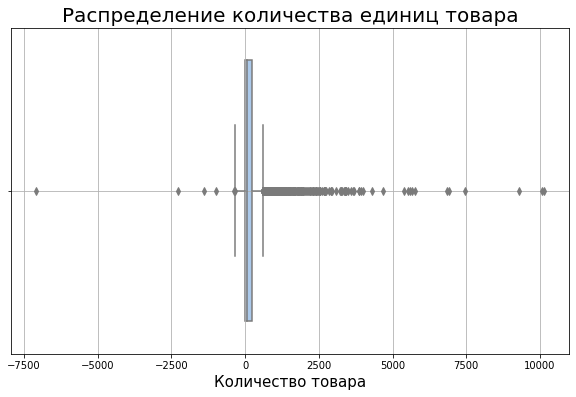

In [34]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='quantity', data=df_3, palette='pastel') 
plt.xlabel('Количество товара',fontsize=15)
plt.grid()
plt.title('Распределение количества единиц товара',fontsize=20)
plt.show()

 На боксплоте наглядно видны аномалии и выбросы.Ограничим на графике рассматриваемую область для наглядности.

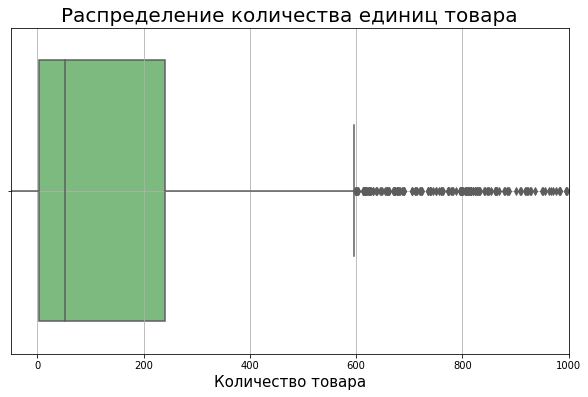

In [35]:
plt.figure(figsize=(10,6))
sns.boxplot(x='quantity', data=df_3, palette='Greens') 
plt.xlabel('Количество товара',fontsize=15)
plt.xlim(-50,1000)
plt.grid()
plt.title('Распределение количества единиц товара',fontsize=20)
plt.show()

In [36]:
print('Количество покупок с  отрицательным числом товаров:', df[df['quantity'] < 0]['purchase_id'].count())
print('Доля покупок с  отрицательным числом товаров:{:.2%}'.format(df[df['quantity'] < 0]['purchase_id'].count()/len(df)))

Количество покупок с  отрицательным числом товаров: 2076
Доля покупок с  отрицательным числом товаров:1.99%


In [37]:
print('Количество покупок с нулевым числом товаров', df[df['quantity'] == 0]['purchase_id'].count())
print('Доля покупок с нулевым числом товаров:{:.2%}'.format(df[df['quantity'] == 0]['purchase_id'].count()/len(df)))

Количество покупок с нулевым числом товаров 32362
Доля покупок с нулевым числом товаров:31.03%


**"Отрицательные покупки"**

"Отрицательные покупки"- это скорее всего возвраты.Что вполне возможно: покупатель по закону имеет право на возврат товара,да и случаи отмены операций по кассе бывают.Посмотрим, какие клиенты совершали эти возвраты.

In [38]:
print('Количество возвратов у  участников программы лояльности:', df.query('quantity < 0 & loyalty_program == 1')['purchase_id'].count())

Количество возвратов у  участников программы лояльности: 439


In [39]:
print('Количество возвратов у остальных покупателей:', df.query('quantity < 0 & loyalty_program == 0')['purchase_id'].count())

Количество возвратов у остальных покупателей: 1637


Посмотрим,что за заказы(возвраты) с числом более 70 000

In [40]:
df.query('quantity < -70000 | quantity > 70000')

,purchase_id,item_id,quantity,purchase_date,customer_id,shop_id,loyalty_program,price_per_one,sum_check,date,month
49166,C541433,23166,-74216,2017-01-18 10:17:00,18025,Shop 0,0,1.04,-77184.64,2017-01-18,2017-01-01
68612,541431,23166,74214,2017-01-18 10:01:00,18025,Shop 0,0,1.04,77182.56,2017-01-18,2017-01-01


Явно видно, что это какая-то ошибочная операция.Был пробит чек на сумму 74 214 руб  и практически сразу же был оформлен возврат на  сумму 74216.Удалим эти значения.

In [41]:
df = df[(df.quantity > -70000) & (df.quantity  < 70000)]

Видно,что возвраты связаны с действиями покупателей и исключать из рассмотрения такие значения совсем не стоит-ведь в итоге они влияют на выручку.Товар, который вернули- это непроданный товар!

**"Нулевые" покупки**
 Посмотрим, что это такое в разрезе принадлежности к программе лояльности и проверим всегда ли за рассматриваемый период встречались такие аномалии.

In [42]:
df[df['quantity'] == 0]['loyalty_program'].value_counts()

0    26776
1     5586
Name: loyalty_program, dtype: int64

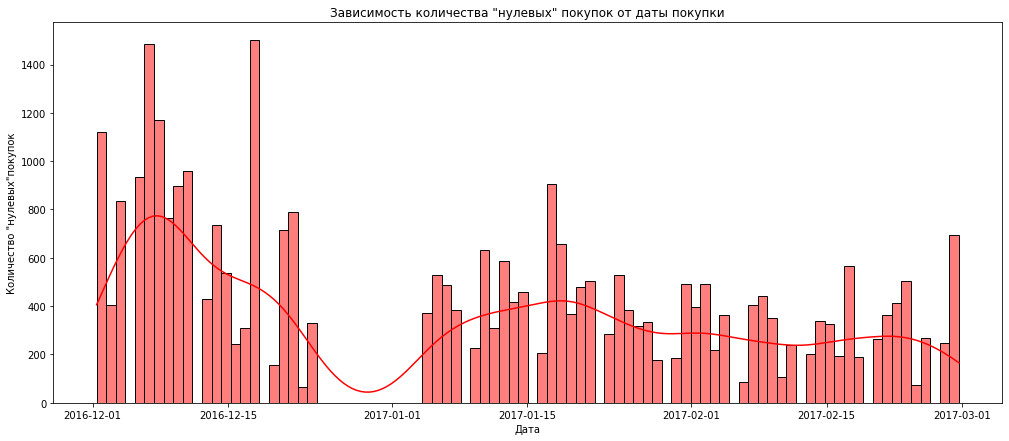

In [43]:
fig, ax = plt.subplots(figsize=(17,7))
sns.histplot(df[df['quantity']==0]['purchase_date'].sort_values(), bins =90, kde=True,color = 'red')
ax.set_xlabel('Дата')
ax.set_ylabel('Количество "нулевых"покупок')
ax.set_title('Зависимость количества "нулевых" покупок от даты покупки')
plt.show()

Получается, что  нулевые значения наблюдаются за весь период наблюдения.Их практически  треть!Либо это какие-либо перемещения товара, либо оказание услуг.Сюда же могут входить и бонусы по программе лояльности.Даже нельзя исключать регулярный технический сбой.К сожалению у нас нет информации об этом.

#### **Вывод по шагу 3.4:**
При анализе данных в столбце `quantity`(количество товара) выявлено следующее: 
  -данные  находятся в диапазоне от-74216 до -74214 ,много нулевых значений
 -  Количество покупок с  отрицательным числом товаров: 2076(1.99% от общего числа)
 -  Количество покупок с нулевым числом товаров 32362(31.03% от общего числа)
 - Сделано предположение, что "Отрицательные покупки"- это скорее всего возвраты.Что вполне возможно:    покупатель по закону имеет право на возврат товара,да и случаи отмены операций по кассебывают.Такие    "возвраты" наблюдаются как и у тех, кто участвует в программе лояльности(439), так и вне программы    лояльности(1637)
 
 - Определено,что за заказы(возвраты) с числом более 70 000 - это какая-то ошибочная операция.Был        пробит чек на сумму 74 214 руб и практически сразу же был оформлен возврат на сумму 74216.
   Эти значениябыли удалены.
   Видно,что возвраты связаны с действиями покупателей и исключать из рассмотрения такие значения
   совсем не стоит-ведь в итоге они влияют на выручку. 
   
 - "Нулевые" покупки  также наблюдались как  у клиентов программы лояльности, так и вне ее.(26776 и
     5586 соответственно.Более того, они наблюдались  в течение всего периода наблюдения!
    Об их природе можно только делать предположения: либо это какие-либо перемещения товара, либо         оказание услуг.Сюда же могут входить и бонусы по программе лояльности.Даже нельзя исключать           регулярный технический сбой.К сожалению у нас нет информации об этом.Пока не будем с этим ничего       делать. А в  дальнейшем, если это будет мешать анализу -удалим.
  


### Анализ цен на товары

На этапе знакомства с данными в столбце с ценой за единицу товара был замечен товар с нулевой ценой.Посмотрим, сколько их.

In [44]:
df['price_per_one'].describe()

count    104300.000000
mean          5.299597
std          69.549890
min           0.000000
25%           1.650000
50%           3.040000
75%           5.205000
max        6706.710000
Name: price_per_one, dtype: float64

In [45]:
print('Количество покупок с нулевой ценой :', df[df['price_per_one'] == 0]['item_id'].count())

Количество покупок с нулевой ценой : 59


Таких покупок немного.Их можно вполне удалить.Хотя, возможно это бонусы.

In [46]:
df = df.query('price_per_one > 0')


Видно также, что есть относительно дорогие товары.В цене нет ничего аномального, однако такую цену можно считать выбросом, который может отрицаательно сказаться на анализе.Посмотрим, сколько покупок у нас дороже 6000 руб

In [47]:
df[df['price_per_one'] >6000]['item_id'].count()

11

Их 11.Также удалим их.

In [48]:
df = df.query('price_per_one < 6000')

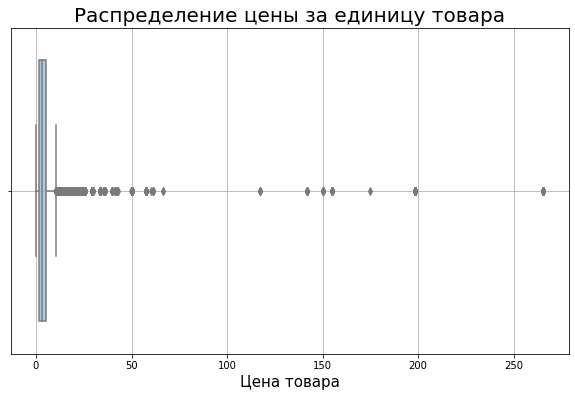

In [49]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='price_per_one', data=df, palette='pastel') 
plt.xlabel('Цена товара',fontsize=15)
plt.grid()

plt.title('Распределение цены за единицу товара',fontsize=20)
plt.show()

По- прежнему достаточно выбросов.Посчитаем значение 99 перцентиля и обрежем данные по этой границе.Построим боксплот по другим данным.

In [50]:
percent_price = np.percentile(df['price_per_one'],99)
percent_price

19.96

In [51]:
df = df.query('price_per_one < @percent_price')

In [52]:
df['price_per_one'].describe()

count    103155.000000
mean          3.975578
std           3.353449
min           0.060000
25%           1.650000
50%           2.950000
75%           4.960000
max          19.950000
Name: price_per_one, dtype: float64

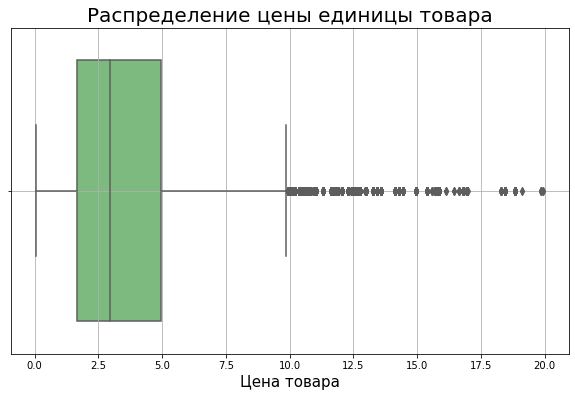

In [53]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='price_per_one', data=df, palette='Greens') 
plt.xlabel('Цена товара',fontsize=15)
plt.grid()

plt.title('Распределение цены единицы товара',fontsize=20)
plt.show()

Теперь картина немного поменялась!

#### **Вывод по шагу 3.5**

- Цены за единицу товара в магазинах находятся в диапазоне от **0** до **6706.71 руб**.

- Обнаружено 59 товаров с 0 ценой и 11 "дорогих" товаров.Это не стоит считать аномалией, однако стоит исключить их рассмотрения   из-за возможных искажений в расчетах.

- Посчитано значение 99 перцентиля - 19.96 руб. Все значения выше также исключены из рассмотрения.

- В очищенных данных остались товары с ценами от 0.06 до 19.95 руб.

### Какие магазины участвуют в программе лояльности?

Посмотрим, сколько всего магазинов.

In [54]:
len(df['shop_id'].value_counts())

31

In [55]:
df_shop = df.groupby('shop_id').agg({'purchase_id': 'nunique', 'item_id': 'nunique', 
                                        'quantity': 'sum', 'customer_id': 'nunique', 
                                        'loyalty_program': 'max', 
                                        'sum_check':'sum','date':'min'})
df_shop['sum_check'] = df_shop['sum_check'].round()
df_shop = df_shop.sort_values('sum_check', ascending = False).reset_index()
df_shop

,shop_id,purchase_id,item_id,quantity,customer_id,loyalty_program,sum_check,date
0,Shop 0,4344,3031,662796,1565,1,1720562.0,2016-12-01
1,Shop 3,15,293,43087,4,0,101737.0,2016-12-01
2,Shop 6,46,629,18283,4,0,54731.0,2016-12-01
3,Shop 4,114,692,17886,43,0,49187.0,2016-12-01
4,Shop 1,89,582,17879,38,0,47618.0,2016-12-01
5,Shop 2,19,201,14493,8,0,39306.0,2016-12-01
6,Shop 14,6,115,6893,4,0,22153.0,2016-12-05
7,Shop 8,20,384,5009,12,1,16951.0,2016-12-03
8,Shop 7,11,255,4498,7,0,11183.0,2016-12-03
9,Shop 19,7,61,6979,3,1,10045.0,2016-12-14


В получившейся таблице:

`shop_id`- id магазина

`purchase_id`- количество покупок в магазине

`item_id` - число уникальных наименований товара

`quantity`- количество товара

`customer_id`- число уникальных покупателей магазина

`loyalty_program`- признак участия в программе лояльности по магазину

`sum_check`- сумма продаж по магазину

`date`- минимальная (ранняя) дата продажи по магазину

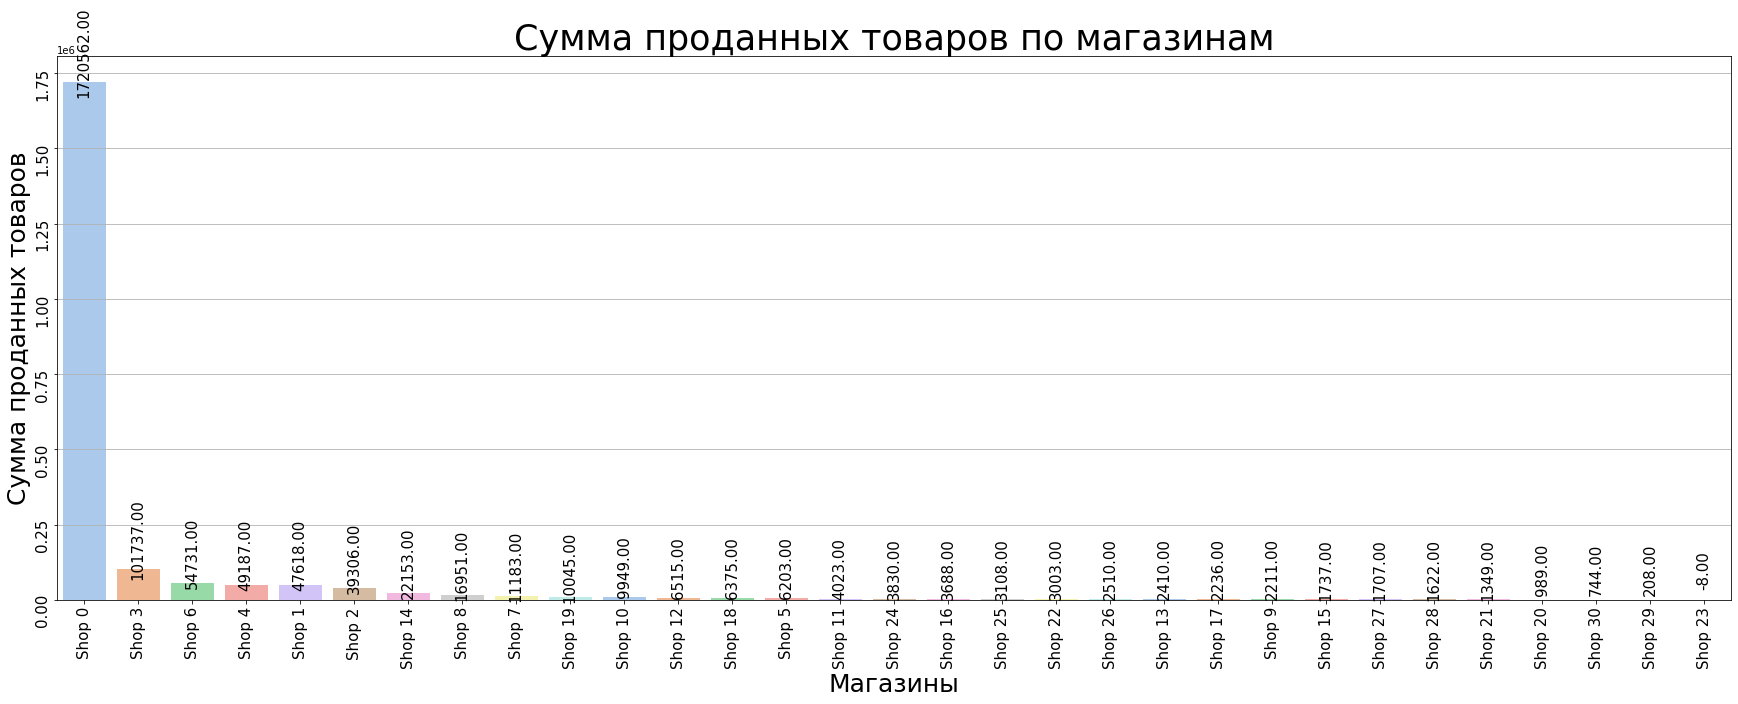

In [56]:
plt.figure (figsize=(30,10))

ax = sns.barplot(x='shop_id',y='sum_check',data=df_shop,
                 palette='pastel')
ax.axes.set_title('Сумма проданных товаров по магазинам',fontsize=35)

ax.set_xlabel('Магазины',fontsize=25)
ax.set_ylabel('Сумма проданных товаров',fontsize=25)
ax.tick_params(labelsize=15,rotation = 90)
for bar in ax.patches:
     ax.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0,30),rotation = 90,
                   textcoords='offset points')

ax.yaxis.grid(True);

Самый крупный- Shop-0.Информация по остальным магазинам не очень наглядна.Построим отдельный график без него.

In [57]:
df_shop1 = df_shop[df_shop['shop_id'] != 'Shop 0']

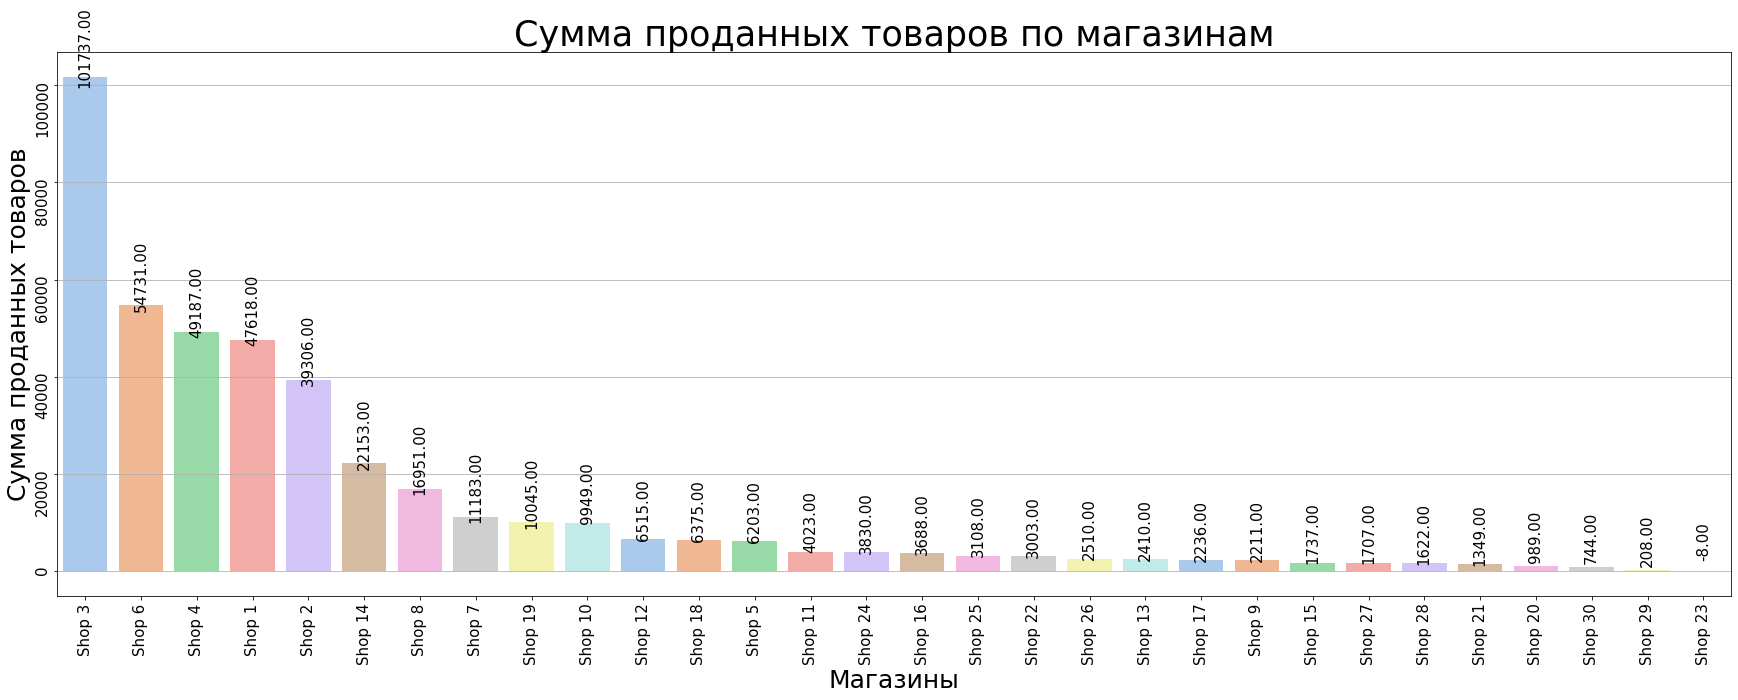

In [58]:
plt.figure (figsize=(30,10))

ax = sns.barplot(x='shop_id',y='sum_check',data=df_shop1,
                 palette='pastel')
ax.axes.set_title('Сумма проданных товаров по магазинам',fontsize=35)

ax.set_xlabel('Магазины',fontsize=25)
ax.set_ylabel('Сумма проданных товаров',fontsize=25)
ax.tick_params(labelsize=15,rotation = 90)
for bar in ax.patches:
     ax.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0,30),rotation = 90,
                   textcoords='offset points')

ax.yaxis.grid(True);

#### **Вывод по шагу 3.6**
- В данных есть информация о 31 магазине.

- Самый крупный из них  - `Shop 0`. Выручка в нем за изучаемый период составила 1 720562 руб. А число уникальных товаров купленных в нем - 3031.

- В прграмме лояльности участвуют  4 магазина:вышеназванный `Shop 0`.
  А также:  `Shop 8` -сумма 16951руб.(384 уникальных товара),`Shop 19`- 10045 руб.(61 уникальнй товаро),`Shop 28`- 1622 руб.(30 уникальных товар).Причем, этот магазин начал работать только в феврале.
  
- После `Shop 0`  идут :`Shop 3`- сумма 101737 руб.,`Shop 6`-сумма 54731 руб.,`Shop 4`-49187 руб.,`Shop 1`- 47618 руб.

- В оставшихся магазинах выручка значительно ниже.И даже есть магазины с одной покупеой! 

- В общем есть большие вопрсы качеству данных!

## Анализ программы лояльности

### Расчет среднего чека для участников программы лояльности и не участвующих в ней покупателей

Перед тем, как вести расчет метрик вспомним,что у нас были обнаружены нулевые количества товаров.Как бы не было жаль,для дальнейшего анализа нужно их удалить.Иначе возможны искажения в расчетах.

In [59]:
df_n = df.query('quantity > 0')

In [60]:
df_n = inform(df_n)

,purchase_id,item_id,quantity,purchase_date,customer_id,shop_id,loyalty_program,price_per_one,sum_check,date,month
0,538280,21873,11,2016-12-10 12:50:00,18427,Shop 0,0,1.630,17.930,2016-12-10,2016-12-01
2,538855,21239,7,2016-12-14 13:50:00,22182,Shop 0,1,1.630,11.410,2016-12-14,2016-12-01
7,541424,79321,1,2017-01-17 17:57:00,0,Shop 0,0,5.750,5.750,2017-01-17,2017-01-01
10,537795,82494L,5,2016-12-08 13:03:00,22892,Shop 0,1,5.205,26.025,2016-12-08,2016-12-01
11,541696,22197,4,2017-01-20 18:08:00,0,Shop 0,0,1.240,4.960,2017-01-20,2017-01-01


<class 'pandas.core.frame.DataFrame'>
Int64Index: 69506 entries, 0 to 104301
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   purchase_id      69506 non-null  object        
 1   item_id          69506 non-null  object        
 2   quantity         69506 non-null  int64         
 3   purchase_date    69506 non-null  datetime64[ns]
 4   customer_id      69506 non-null  int64         
 5   shop_id          69506 non-null  object        
 6   loyalty_program  69506 non-null  int64         
 7   price_per_one    69506 non-null  float64       
 8   sum_check        69506 non-null  float64       
 9   date             69506 non-null  datetime64[ns]
 10  month            69506 non-null  datetime64[ns]
dtypes: datetime64[ns](3), float64(2), int64(3), object(3)
memory usage: 6.4+ MB
Количество дубликатов - 0
Число пропусков - purchase_id        0
item_id            0
quantity           0
purchase_date

,quantity,customer_id,loyalty_program,price_per_one,sum_check
count,69506.000000,69506.000000,69506.000000,69506.000000,69506.000000
mean,12.440624,16105.270121,0.249058,3.714191,32.877615
std,53.957525,8924.259119,0.432470,3.169652,132.390158
min,1.000000,0.000000,0.000000,0.060000,0.100000
25%,2.000000,18150.000000,0.000000,1.630000,5.790000
50%,5.000000,19986.000000,0.000000,2.550000,13.640000
75%,11.000000,21994.000000,0.000000,4.370000,27.170000
max,5567.000000,23962.000000,1.000000,19.840000,12977.010000


Создадим датафрейм с агрегированными данными и добавим туда колонки с суммой среднего чека `avg_check` и средним числом товаров в чеке -`avg_quan`

In [61]:
df_new= df_n.groupby(['loyalty_program','date']).agg({'customer_id':['nunique'],'purchase_id': ['nunique'], 'sum_check':['sum'], 'quantity':['sum']}).reset_index()
df_new.columns = ['loyalty_program','date','customer_id','purchase_id', 'sum_check', 'quantity']
df_new['avg_check'] = round(df_new['sum_check']/df_new['purchase_id'], 2)
df_new['avg_quan'] = round(df_new['quantity']/df_new['purchase_id'], 2)
df_new.head(5)

,loyalty_program,date,customer_id,purchase_id,sum_check,quantity,avg_check,avg_quan
0,0,2016-12-01,59,79,54627.750,18660,691.49,236.20
1,0,2016-12-02,64,76,45302.975,18313,596.09,240.96
2,0,2016-12-03,32,49,35181.295,11871,717.99,242.27
3,0,2016-12-05,50,60,25776.905,8810,429.62,146.83
4,0,2016-12-06,46,64,32886.800,11716,513.86,183.06


In [62]:
df_new.describe()

,loyalty_program,customer_id,purchase_id,sum_check,quantity,avg_check,avg_quan
count,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000
mean,0.500000,22.882353,27.110294,16802.878750,6358.073529,595.666838,230.736691
std,0.501848,13.576701,18.096315,14517.161664,5069.992494,346.327396,127.028462
min,0.000000,1.000000,1.000000,385.095000,88.000000,229.370000,57.000000
25%,0.000000,12.000000,12.000000,5345.037500,2162.250000,391.562500,146.352500
50%,0.500000,20.500000,22.000000,13330.772500,5090.500000,502.275000,192.675000
75%,1.000000,33.000000,40.000000,21628.175000,9538.250000,621.467500,263.142500
max,1.000000,66.000000,92.000000,72283.465000,22734.000000,2151.510000,848.170000


Посмотрим распределение суммы  чека

In [63]:
check = df_n.groupby(['loyalty_program','purchase_id'], as_index=False).agg({'sum_check':'sum'})
check 

,loyalty_program,purchase_id,sum_check
0,0,536367,285.395
1,0,536368,96.090
2,0,536369,13.200
3,0,536370,1261.270
4,0,536371,462.150
...,...,...,...
3682,1,545186,171.425
3683,1,545187,155.165
3684,1,545213,321.290
3685,1,545214,218.710


In [64]:
check['sum_check'].describe()

count     3687.000000
mean       619.796992
std       1362.315921
min          0.390000
25%        143.680000
50%        322.270000
75%        602.535000
max      23603.430000
Name: sum_check, dtype: float64

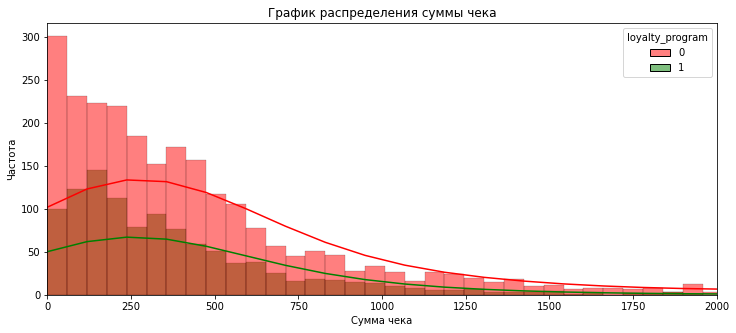

In [65]:
fig = plt.figure(figsize=(12, 5))
ax = sns.histplot(x= 'sum_check', hue='loyalty_program', data=check,kde=True,palette=['red','green'])
ax.set_title('График распределения суммы чека')
ax.set_xlabel('Сумма чека')
ax.set_ylabel('Частота')
ax.set_xlim(0,2000)
#ax.legend(title='Участники программы лояльности', labels=['Не участвуют', 'Участвуют'])
plt.show()

Данные очень шумные, есть редкие крупные покупки.

In [66]:
mean_check = df_new.groupby('loyalty_program', as_index=False).agg({'avg_check':'mean'})
mean_check['avg_check'] = round(mean_check['avg_check'],2)

print('Средний чек участников программы：{} ，средний чек остальных покупателей:{}'.format(mean_check['avg_check'][1],mean_check['avg_check'][0]))

Средний чек участников программы：531.78 ，средний чек остальных покупателей:659.56


#### **Вывод по шагу 4.1:**
  - Перед расчетом метрик удалны данные с нулевым значение в чеках.
  - Сумма общего среднего чека: от 236.46 руб. до 2151.51 руб.Среднее значение-595.66 руб.Медиана-         502.27руб.большая часть  значений среднего чека находится в пределах 300-600 руб.
  - Данные очень "шумные", есть редкие крупные покупки.Распределение не номальное.Покупатели чаще         всего делают небольшие покупки до 600 руб.
  - Средний чек участников программы：531.78 ，средний чек остальных покупателей:659.56

### Расчет среднего количества товарных позиций  у участников программы и других покупателей

Аналогичным образом посмотрим на распределение числа  купленных единиц товара на участников программы и других покупателей

In [67]:
quan = df_n.groupby(['loyalty_program','purchase_id'], as_index=False).agg({'quantity':'sum'})
quan

,loyalty_program,purchase_id,quantity
0,0,536367,71
1,0,536368,11
2,0,536369,2
3,0,536370,429
4,0,536371,79
...,...,...,...
3682,1,545186,67
3683,1,545187,80
3684,1,545213,113
3685,1,545214,90


In [68]:
quan.describe()

,loyalty_program,quantity
count,3687.000000,3687.000000
mean,0.302956,234.526173
std,0.459599,512.248497
min,0.000000,1.000000
25%,0.000000,47.000000
50%,0.000000,110.000000
75%,1.000000,232.000000
max,1.000000,8315.000000


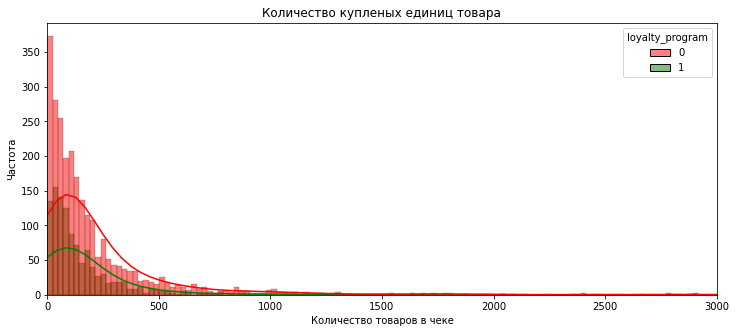

In [69]:
fig = plt.figure(figsize=(12, 5))
ax = sns.histplot(x= 'quantity', hue='loyalty_program', data=quan,kde=True,palette=['red','green'])
ax.set_title('Количество купленых единиц товара')
ax.set_xlabel('Количество товаров в чеке')
ax.set_ylabel('Частота')
ax.set_xlim(0,3000)
plt.show()

Для распределения количества товарных позиций в чеке наблюдается картина, аналогичная чекам.Чаще покумают меньшее количество товара

In [70]:
mean_quan = df_new.groupby('loyalty_program', as_index=False).agg({'avg_quan':'mean'})
mean_quan['avg_quan'] = round(mean_quan['avg_quan'],2)

print('Среднее число товаров в чеке участников программы：{},Среднее число товаров в чеке остальных покупателей:{}'.format(mean_quan['avg_quan'][1],mean_quan['avg_quan'][0]))

Среднее число товаров в чеке участников программы：214.6,Среднее число товаров в чеке остальных покупателей:246.87


#### **Вывод по шагу 4.2:**
  -  На графике видно,что в целом "лояльные" покупатели чаще имеют мньше товарных позиций в чеке.
  -  Cреднее число товаров в чеке участников программы：214.16,а среднее число товаров в чеке остальных 246.87.Получается,что "нелояльные" клиенты чаще покупают более дешевый товар,но в большем количестве.
  - Распределение также не является нормальным.

### Расчет среднего числа заказов на одного клиента для участников программы лояльности и не участвующих в ней покупателей

In [71]:
df_new1= df_n.groupby(['loyalty_program']).agg({'purchase_id': ['nunique'], 'customer_id':['nunique']}).reset_index()
df_new1['avg_order'] = round(df_new1['purchase_id']/df_new1['customer_id'], 2)
df_new1.head(5)

,loyalty_program,purchase_id,customer_id,avg_order
,,nunique,nunique,
0,0,2570,1107,2.32
1,1,1117,560,1.99


In [72]:
print('Среднее количество покупок на одного участника программы лояльности ：{}  остальных покупателей:{}'.format(df_new1['avg_order'][1],df_new1['avg_order'][0]))

Среднее количество покупок на одного участника программы лояльности ：1.99  остальных покупателей:2.32


#### **Вывод по шагу 4.3:**
 - Среднее количество покупок на одного участника программы лояльности - 1.99, а у остальных покупателей-2.32.Что общем близко по значению.
    

### Графики среднего чека в в зависимости от времени с разбивкой на две категории (с картой лояльности и без нее)

Построим графики распределения среднего чека в в зависимости от времени.

**По дням**

Воспользуемся библиотекой `Plotly`.Она даст хорошую возможность подробно все рассмотреть на графике.Для удобства работы с графиками переименуем значения  `loyalty_program`

In [73]:
df_new['loyalty_program'] = df_new['loyalty_program'].replace({0: 'Не участвуют', 1:'Участвуют'})

In [74]:
fig = px.bar(df_new, 
             x='date', 
             y='avg_check', 
             text='avg_check',                    
             color='loyalty_program',barmode='group',color_discrete_sequence=[
                 "orange","green"])

fig.update_layout(title='Средний чек по дням с разбивкой по категориям покупателей',
                   xaxis_title='День',
                   yaxis_title='Сумма заказа')
fig.show()

Для наглядности продублируем линейным графиком.

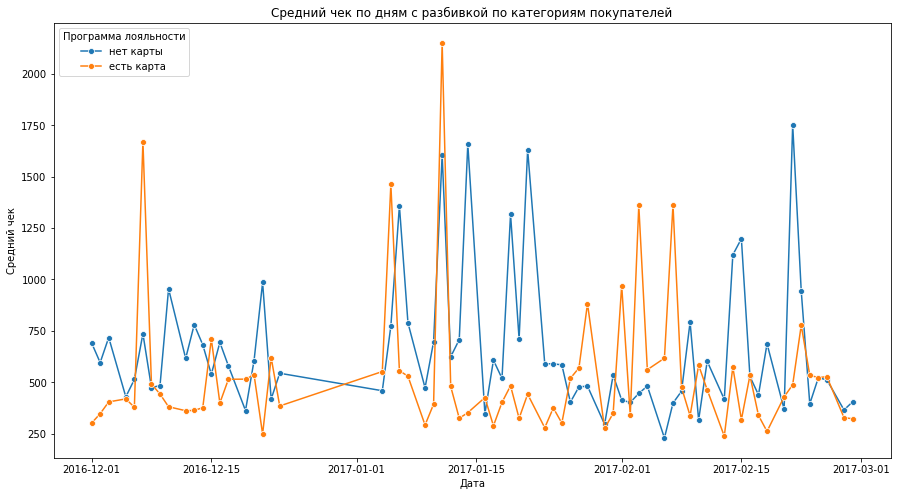

In [75]:
plt.subplots(figsize = (15,8))
sns.lineplot(x='date', y='avg_check', hue = 'loyalty_program', data = df_new,marker='o')
plt.legend(title='Программа лояльности', loc='upper left', labels=['нет карты', 'есть карта'])
plt.title('Средний чек по дням с разбивкой по категориям покупателей')
plt.ylabel('Средний чек')
plt.xlabel('Дата')
plt.show()

**По месяцам**

In [76]:
df_new1= df_n.groupby(['loyalty_program','month']).agg({'customer_id':['nunique'],'purchase_id': ['nunique'], 'sum_check':['sum'], 'quantity':['sum']}).reset_index()
df_new1.columns = ['loyalty_program','month','customer_id','purchase_id', 'sum_check', 'quantity']
df_new1['avg_check'] = round(df_new1['sum_check']/df_new1['purchase_id'], 2)
df_new1['avg_quan'] = round(df_new1['quantity']/df_new1['purchase_id'], 2)
df_new1['loyalty_program'] = df_new1['loyalty_program'].replace({0: 'Не участвуют', 1:'Участвуют'})
df_new1.head(5)

,loyalty_program,month,customer_id,purchase_id,sum_check,quantity,avg_check,avg_quan
0,Не участвуют,2016-12-01,559,1032,648364.765,229178,628.26,222.07
1,Не участвуют,2017-01-01,507,790,612257.115,229049,775.01,289.94
2,Не участвуют,2017-02-01,493,748,442423.365,173363,591.48,231.77
3,Участвуют,2016-12-01,321,506,244371.505,90038,482.95,177.94
4,Участвуют,2017-01-01,227,281,148792.635,59243,529.51,210.83


In [77]:
fig = px.bar(df_new1, 
             x='month', 
             y='avg_check', 
             text='avg_check',                    
             color='loyalty_program',barmode='group',color_discrete_sequence=[
                 "orange","green"])

fig.update_layout(title='Средний чек по месяцам с разбивкой по категориям покупателей',
                   xaxis_title='Месяц',
                   yaxis_title='Сумма среднего чека')
fig.show()

#### **Вывод по шагу 4.4:**
    
   - На графике по среднего чека по дням четко видно(как было замечено ранее) что продаж  с 24 декабря 2016 г. по 3 января          продаж не было.
   
   - Стоит отметить,что какой-то четкой закономерности в распределении чеков по дням не наблюдается.В декабре были стабильные      продажи.Наблюдался всплески - 7 декабря(1670,84 руб) и 11 января(2151,51 руб)у "лояльных" клиентов.Хотя в целом средний чек    у "нелояльных" покупателей больше в конце января- в начале февраля средний чек у "лояльных" покупателей был выше.
    
   - По месяцам суммы среднего чека распределились так:
    
      - Для участников программы лояльности
        декабрь 2016 -628.26 руб,январь 2017-775.01 руб,февраль 2017 -591.48 руб.
        
     - Для не участвовавших в  программе лояльности:
        декабрь 2016 -482.95 руб,январь 2017-529.51 руб,февраль 2017 - 572.57 руб.
        
    Видим  тенденция к увеличению среднего чека среди "лояльных" покупателей!
    

### Графики среднего количества единиц товара в чеке в день и месяц с разбивкой на две категории (с картой лояльности и без нее)

Построим аналогичные графики для среднего числа товарных позиций в чеке по дням и месяцам

In [78]:
fig = px.bar(df_new, 
             x='date', 
             y='avg_quan', 
             text='avg_quan',                    
             color='loyalty_program',barmode='group',color_discrete_sequence=[
                 "orange","green"])

fig.update_layout(title='Cреднее количествo единиц товара в чеке в день с разбивкой по категориям покупателей',
                   xaxis_title='День',
                   yaxis_title='Количество товаров')
fig.show()

In [79]:
fig = px.bar(df_new1, 
             x='month', 
             y='avg_quan', 
             text='avg_quan',                    
             color='loyalty_program',barmode='group',color_discrete_sequence=[
                 "orange","green"])

fig.update_layout(title='Cреднее количествo единиц товара в чеке в день с разбивкой по категориям покупателей',
                   xaxis_title='Месяц',
                   yaxis_title='Среднее число товрных позиций')
fig.show()

#### **Вывод  по шагу 4.5:**
    
   - На графике среднеего количествo товарных единиц в чеке по дням наблюдается картина похожая на графики средних чеков.
   
   - В декабре были более стабильные продажи.Наблюдался всплеск - 7 декабря(376) )у "лояльных" клиентов.но в этот день это не привело к большой сумме продажи.В январе есть подъем по числу товарных позиций в чеке 11 января и 3 февраля.
    
   - По месяцам количествo товарных единиц в чекераспределились так:
    
      - Для участников программы лояльности
        декабрь 2016 -177.94 ,январь 2017-210.73 ,февраль 2017 -254.02 
        
     - Для не участвовавших в  программе лояльности:
        декабрь 2016 -222.07 ,январь 2017-289.94 ,февраль 2017 - 231.77 
        
    Видно, что число среднее товарных позиций  феврале у "лояльных"клиентов опережает "нелояльных"
"
    

### Расчет LTV и построение графиков

In [80]:
#агрегируем данные

df_ltv = df_n.groupby('customer_id', as_index=False).agg({'purchase_date':['min','max'], 'sum_check':'sum', 'loyalty_program':'max', 'month':'nunique'}).copy()
df_ltv.columns = ['customer_id','first_date','last_date', 'revenue', 'loyalty_program','m_count']
df_ltv['dt'] = df_ltv['first_date'].dt.date
df_ltv.loc[df_ltv['loyalty_program']==0, 'm_count'] = 0

#добавляем 200 рублей
df_ltv.loc[df_ltv['loyalty_program']==1, 'revenue'] = (
    df_ltv.loc[df_ltv['loyalty_program']==1, 'revenue'] + 
    (df_ltv.loc[df_ltv['loyalty_program']==1,'m_count'] * 200))
df_ltv

,customer_id,first_date,last_date,revenue,loyalty_program,m_count,dt
0,0,2016-12-01 11:52:00,2017-02-28 16:59:00,223521.230,0,0,2016-12-01
1,18026,2016-12-07 14:57:00,2017-01-26 14:30:00,1736.520,0,0,2016-12-07
2,18027,2016-12-16 19:09:00,2017-01-25 10:42:00,2004.205,0,0,2016-12-16
3,18029,2017-02-02 16:01:00,2017-02-02 16:01:00,386.180,0,0,2017-02-02
4,18031,2017-02-16 12:33:00,2017-02-16 12:33:00,390.170,0,0,2017-02-16
...,...,...,...,...,...,...,...
1662,23936,2017-02-16 15:13:00,2017-02-22 11:05:00,643.070,1,1,2017-02-16
1663,23938,2016-12-08 13:38:00,2016-12-08 13:38:00,654.980,1,1,2016-12-08
1664,23939,2016-12-16 18:23:00,2017-01-09 14:42:00,1344.695,1,2,2016-12-16
1665,23948,2016-12-08 13:53:00,2016-12-08 13:53:00,380.845,1,1,2016-12-08


In [81]:
def get_ltv(
    df,  # Получить профили и данные о покупках
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = df.query('first_date <= @last_suitable_acquisition_date').copy()

    # Рассчитать лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['last_date'] - result_raw['first_date']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']
    
    #функция заполнения lifetime пробелов
    def fill_lt(result_raw):
        #список пропущенных lifetime
        diff = set(list(range(result_raw['lifetime'].max()))) - set(result_raw['lifetime'].unique().tolist())
        diff = list(diff)

        #добавляем пропуски в data frame
        if diff != []:
            # создаем новую строку
            for i in range(len(diff)):
                new_row = {'lifetime': diff[i]}
                result_raw = result_raw.append(new_row, ignore_index=True)
            result_raw['lifetime'] = result_raw['lifetime'].astype('int')
            return result_raw
        else:
            return result_raw

    #функция дополнения lifetime пробелом
    result_raw = fill_lt(result_raw)
    result_raw['loyalty_program'] = result_raw['loyalty_program'].fillna(0)
    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):

        # Построить таблицу выручки
        # строим «треугольную» таблицу
        result = df.pivot_table(
            index=dims,
            columns='lifetime',
            values='revenue',  
            aggfunc='sum',
        )

        # Посчитать сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)

        # Вычислить размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'customer_id': 'nunique'})
            .rename(columns={'customer_id': 'cohort_size'})
        )

        # Объединить размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)

        # Посчитать LTV
        # делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу LTV
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики LTV убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
          dimensions = []
    return result_raw, result_grouped

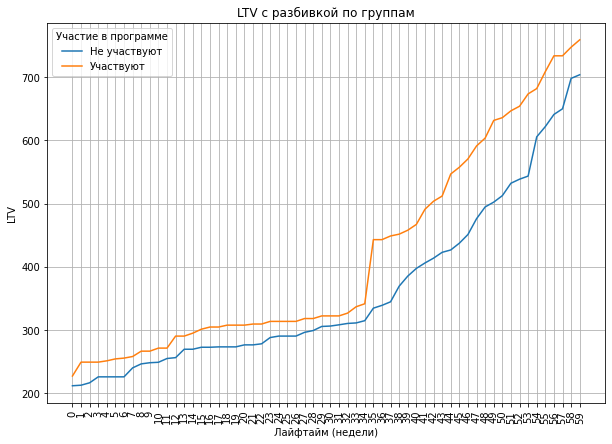

In [82]:
ltv_raw, ltv = get_ltv(df_ltv, datetime(2017, 3, 1).date(),60, dimensions=['loyalty_program'])

report = ltv.drop(columns=['cohort_size'])
report.T.plot(grid=True, figsize=(10,7), xticks=list(report.columns.values))
plt.title('LTV с разбивкой по группам')
plt.ylabel('LTV')
plt.xlabel('Лайфтайм (недели)')
plt.legend(title='Участие в программе', labels=['Не участвуют','Участвуют'])
plt.xticks(rotation=90)
plt.show()

In [83]:
df_ltv.groupby('loyalty_program').agg({'revenue': ['sum']}).reset_index().round(2)

,loyalty_program,revenue
,,sum
0,0,1703045.25
1,1,743346.26


#### **Вывод по шагу 4.7**

- На графике LTV  видно, что кривая покупателей принимающих участие в программе лояльности растет       быстрее и опережает кривую для "нелояльных" клиентов!И это вселяет некий оптимизм!

- Выручка от клиентов без карт лояльность составила 1703045.25 руб

- Выручка от клиентов с картами лояльности составила,с учетом продажи карт лояльности                   клиентам,составила 743346.26 руб

## Шаг 5. Проверка статистических гипотез

### Проверка гипотезы: Средний чек участников программы лояльности отличается от чека остальных покупателей

**Сформулируем:**

- **H0** -средний чек с картой программы лояльности и без неё одинаков

- **H1** -средний чек с картой лояльности отличается от среднего чека без неё

   **alpha = 0.05**
- У нас выборки различны по размеру и не имеют нормального распределения.Применим для проверки статистических гипртез **критерий Манна-Уитни**

Ранее мы создавали датафрейм `df_new`.При исследовании средних чеков было обнаружены редкие, выбивающиеся значения.Посмотрим на значение **95** и **99** перцентилей

In [84]:
avg_check_per= np.percentile(df_new['avg_check'], [95, 99])
avg_check_per

array([1387.815, 1723.737])

Ограничим выборку 95 перцентилем.

In [85]:
df_new =  df_new.query('avg_check <=@avg_check_per[1]').reset_index(drop=True)
df_new['avg_check'].describe()

count     134.000000
mean      575.425075
std       305.083409
min       229.370000
25%       387.247500
50%       490.250000
75%       617.207500
max      1670.840000
Name: avg_check, dtype: float64

Разобьем на  2 выборки и проведем тест

In [86]:
check_0  = df_new.query('loyalty_program=="Не участвуют"')['avg_check'].reset_index(drop=True)
check_1 = df_new.query('loyalty_program=="Участвуют"')['avg_check'].reset_index(drop=True)

In [87]:
alpha = 0.05
p_value = st.mannwhitneyu(check_0,check_1)[1]
print("P-value: {0:.5f}".format(p_value))

if p_value < alpha:
    print("Отвергаем нулевую гипотезу: между группами есть разница")
else:
    print("Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы разными")
    
print("Относительный прирост среднего чека при внедрении программы лояльности: {0:.2%}".
      format(check_1.mean() /check_0.mean()-1))

P-value: 0.00014
Отвергаем нулевую гипотезу: между группами есть разница
Относительный прирост среднего чека при внедрении программы лояльности: -21.09%


### Проверка гипотезы: Среднее число товаров чеке не зависит от участия в программе лояльности 
   

**Сформулируем**
  - **H0** - среднее число товаров в чеке одинаково у покупателей в программе лояльности и без нее  
         
  - **H1** - среднее число товаров в чеке отличается  у покупателей в программе лояльности и без нее
     **alpha = 0.05**
    **Применим также для проверки статистических гипртез критерий Манна-Уитни**

Аналогично посмотрим на значение перцентилей

In [88]:
avg_quan_per= np.percentile(df_new['avg_quan'], [95, 99])
avg_quan_per

array([442.541, 566.279])

In [89]:
df_new =  df_new.query('avg_quan <=@avg_quan_per[1]').reset_index(drop=True)
df_new['avg_quan'].describe()

count    132.000000
mean     216.497424
std       96.806011
min       57.000000
25%      144.807500
50%      191.505000
75%      248.057500
max      559.110000
Name: avg_quan, dtype: float64

Разобьем на  2 выборки и проведем тест

In [90]:
quan_0  = df_new.query('loyalty_program=="Не участвуют"')['avg_quan'].reset_index(drop=True)
quan_1 = df_new.query('loyalty_program=="Участвуют"')['avg_quan'].reset_index(drop=True)

In [91]:
alpha = 0.05
p_value = st.mannwhitneyu(quan_0,quan_1)[1]
print("P-value: {0:.5f}".format(p_value))

if p_value < alpha:
    print("Отвергаем нулевую гипотезу: между группами есть разница")
else:
    print("Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы разными")
    
print("Относительный прирост среднего количества товаров в чеке с картой лояльности : {0:.2%}".format(quan_1.mean() /quan_0.mean()-1))

P-value: 0.00659
Отвергаем нулевую гипотезу: между группами есть разница
Относительный прирост среднего количества товаров в чеке с картой лояльности : -15.58%


#### **ВЫВОД по шагу 5:**

  Проведены проверки двух статистических гипотез выбрано **alpha = 0.05** и для проверки применен критерий Манна-Уитни**
   **1.Средний чек участников программы лояльности отличается от чека остальных покупатей**
     Сформулироапны гипотезы:
     
   **H0** -средний чек с картой программы лояльности и без неё одинаков
   **H1** -средний чек с картой лояльности отличается от среднего чека без неё
           Значение P-value:0.00014< 0.05 соответственно нулевая отвергнута.Соответственно у нас есть основания                      полагать,что между группами есть статистически значимые различия
       Относительный прирост суммы среднего  чека  с картой лояльности отрицательный : -21.09%
       
   **2.Среднее число товаров чеке не зависит от участия в программе лояльности **.
    **H0** - среднее число товаров в чеке одинаково у покупателей в программе лояльности и без нее       
    **H1** - среднее число товаров в чеке отличается  у покупателей в программе лояльности и без нее
              выбрано **alpha = 0.05** и для проверки применен критерий Манна-Уитни**
       Значение P-value: 0.00659< 0.05.Таким образом мы подтвердили, что между группами есть разница
       Среднннее количество товаров чеке обычных покупателей выше на -15.58%


## Шаг 6. Выводы и рекомендации

Для анализа нам предоставлены данные за  период **с 1 декабря 2016 года по 28 февраля 2017 года**о покупках в магазине строительных материалов «Строили, строили и наконец построили». Все покупатели могут получить доступ в магазин с использованием персональных карт. За 200 рублей в месяц они могут стать участниками программы лояльности.

**Задачи проекта:**

Провести исследовательский анализ данных показать общую картину,
получить основные ритейл-метрики по когортам у клиентов внутри программы лояльности и вне ее,
проанализировать насколько сработала текущая программа лояльности сделать выводы и дать рекомендации по дальнейшему использованию программы лояльности.

**Заказчик:** менеджер проекта, который отвечает за программу лояльности


**ВЫВОДЫ**

В рамках работы над проектом выполнны  следующие задачи и сделаны выводы:

**НА ЭТАПЕ ЗНАКОМСТВА С ДАННЫМИ**
Данные к сожалению,достаточно "грязные"
Основная `Таблица retail_df`(7 столбцов и 105335 строк.) Каждая сторока содержит данные об одной покупке: какой товар,когда и в каком количестве был куплен.Указан ID покупателя, который его купил, чек, в который входил этот от товар,а также информация о том, участвует ли покупатель в программе лояльности.
- Названия столбцов не соответствуют общепринятому виду.Следует привести их к нижнему регистру и единому стилю. 
- Есть пропуски в столбце `CustomerID`- 36210
- Количество дубликатов - 1033
- В столбце `purchasedate` данные имеют тип `object`- его следует заменить на  `datetime`.А в столбцах `CustomerID` и `loyalty_program`  тип `float` следует  поменять на  `int` .
- В столбце `Quantity` видно, что есть отрицательные значения - также стоит понять,что это значит.

`Таблица product_df`
- Содержит 9969 записей  о товарах и их стоимости.Где `productID` — id товара ,а `price_per_one` — стоимость одной единицы товара
- Пропусков и дубликатов не обнаружено
- Типы данных соответствуют природе
- Названия столбцов также следует привести  к нижнему регистру и единому стилю.

**НА ЭТАПЕ ПРЕДОБРАБОТКИ ДАННЫХ**

- Названия столбцов приведены общепринятому виду.

- Удалены полные дубликаты.Доля дубликатов составила 0.98%

- Обнаружено, что доля пропусков в `сustomer_id` велика **-34.4%**.Удалять иx нецелесообразно.Эти пропуски,скорее всего, имеют естественную природу.Это могут быть покупатели, которые не имеют карт клиента и никак не регистрировались в магазине- соответственно и не имеют никакого ID.Среди участников программы лояльности таких покупателей не обнаруженои большая часть остальных покупателей имеют информацию о ID.Так как восстановить такие пропуски не представляется возможным эти пропуски заменили на `0`.

- В столбце `purchase_date`  тип данных заменен на `datetime`.А в столбцах CustomerID и loyalty_program тип `float` заменен на `int`.

- Определено, что один товар имеет несколько цен.Для продаж это нормальное явление.Однако для дальнейшего анализа цену продукта заменили на медианное значение.

**НА ЭТАПЕ ИССЛЕДОВАТЕЛЬСКОГО АНАЛИЗА ДАННЫХ определено:**

- В программе лояльности участвует 587(33,5%) покупателей.И 1163(66,5%) не участвует. 

- Данные представлены за период от 2016-12-01 08:26:00 до 2017-02-28 17:04:00.То есть за 3 месяца: декабрь 2016 и январь и февраль 2017 года.
- Добавлены отдельные столбцы с датой без времени, месяцем.
- Построен график зависимости количества покупок от даты покупки.Замечено, что с 24 декабря 2016 г. по 3  января продаж не было.(Предновогодняя неделя и праздничные дни)
- В декабре покупатели были более актиными.
- Установлено, что  воскресенье в магазинах является выходным днем.

**При анализе данных в столбце quantity(количество товара) выявлено следующее:**
   - данные находятся в диапазоне от-74216 до -74214 ,много нулевых значений
   - Количество покупок с отрицательным числом товаров: 2076(1.99% от общего числа)
   - Количество покупок с нулевым числом товаров 32362(31.03% от общего числа)
   - Сделано предположение, что "Отрицательные покупки"- это скорее всего возвраты.Что вполне               возможно:покупатель по закону имеет право на возврат товара,да и случаи отмены операций по             кассебывают.Такие    "возвраты" наблюдаются как и у тех, кто участвует в программе                     лояльности(439), так и вне программы    лояльности(1637)
   - Определено,что за заказы(возвраты) с числом более 70 000 - это какая-то ошибочная операция.Был         пробит чек на сумму 74 214 руб и практически сразу же был оформлен возврат на сумму 74216. Эти         значениябыли удалены. Видно,что возвраты связаны с действиями покупателей и исключать из               рассмотрения такие значения совсем не стоит-ведь в итоге они влияют на выручку.
   - "Нулевые" покупки также наблюдались как у клиентов программы лояльности, так и вне ее.(26776 и         5586 соответственно.Более того, они наблюдались в течение всего периода наблюдения! Об их             природе можно только делать предположения: либо это какие-либо перемещения товара, либо оказание       услуг.Сюда же могут входить и бонусы по программе лояльности.Даже нельзя исключать регулярный       технический  сбой.К сожалению у нас нет информации об этом.
**Цена за единицу товара**
  - Цены за единицу товара в магазинах находятся в диапазоне от **0** до **6706.71 руб**.

  - Обнаружено 59 товаров с 0 ценой и 11 "дорогих" товаров.Это не стоит считать аномалией, однако          стоит исключить их рассмотрения   из-за возможных искажений в расчетах.
  - Посчитано значение 99 перцентиля - 19.96 руб. Все значения выше также исключены из рассмотрения.
  - В очищенных данных остались товары с ценами от 0.06 до 19.95 руб.

#### **Вывод по шагу 3.6**
- В данных есть информация о 31 магазине.

- В данных есть информация о 31 магазине.

- Самый крупный из них  - `Shop 0`. Выручка в нем за изучаемый период составила 1 720562 руб. А число уникальных товаров купленных в нем - 3031.

- В прграмме лояльности участвуют  4 магазина:вышеназванный `Shop 0`.
  А также:  `Shop 8` -сумма 16951руб.(384 уникальных товара),`Shop 19`- 10045 руб.(61 уникальнй товаро),`Shop 28`- 1622 руб.(30 уникальных товар).Причем, этот магазин начал работать только в феврале.
  
- После `Shop 0`  идут :`Shop 3`- сумма 101737 руб.,`Shop 6`-сумма 54731 руб.,`Shop 4`-49187 руб.,`Shop 1`- 47618 руб.
- В общем есть большие вопрсы качеству данных!
- В оставшихся магазинах выручка значительно ниже.И даже есть магазины с одной покупкой! 
- Всего в магазинах представлено  3159 уникальных товара.

- Среди наиболее популярных стоит назвать:

      -арт.22423  - продано 3288 единиц на сумму  41872,68 руб
      -арт.85123A - продано 10051 единица на сумму 31107,84 руб   
      -арт.79321  - продано 3373 единицы на сумму  19394,75 руб   
      -арт.21623  - продано 2070 единиц на сумму  19095,75 руб    
      -арт.85099B - продано 5598 единиц на сумму 18417.42 руб
      
**НА ЭТАПЕ АНАЛИЗА ПРОГРАММЫ ЛОЯЛЬНОСТИ**

  - Перед расчетом метрик удалны данные с нулевым значение в чеках.
  
**Расчет среднего чека**

  - Перед расчетом метрик удалны данные с нулевым значение в чеках.
  - Сумма общего среднего чека: от 236.46 руб. до 2151.51 руб.Среднее значение-595.66 руб.Медиана-         502.27руб.большая часть  значений среднего чека находится в пределах 300-600 руб.
  - Данные очень "шумные", есть редкие крупные покупки.Распределение не номальное.Покупатели чаще         всего делают небольшие покупки до 600 руб.
  - Средний чек участников программы：531.78 ，средний чек остальных покупателей:659.56
**Расчет среднего числа товаров в чеке**

  -  На графике видно,что в целом "лояльные" покупатели чаще имеют мньше товарных позиций в чеке.
  -  Cреднее число товаров в чеке участников программы：214.16,а среднее число товаров в чеке остальных 246.87.Получается,что "нелояльные" клиенты чаще покупают более дешевый товар,но в большем количестве.
  - Распределение также не является нормальным.
  
**Среднее число покупок на одного покпателя**

  - Среднее количество покупок на одного участника программы лояльности - 1.99, а у остальных    покупателей-2.32.Что общем близко по значению.
  
**Графики среднего чека**
   - На графике по среднего чека по дням четко видно(как было замечено ранее) что продаж  с 24    декабря 2016 г. по 3 января  продаж не было.
   
   - Стоит отметить,что какой-то четкой закономерности в распределении чеков по дням не          наблюдается.В декабре были стабильные      продажи.Наблюдался всплески - 7 декабря(1670,84    руб) и 11 января(2151,51 руб)у "лояльных" клиентов.Хотя в целом средний чек    у              "нелояльных" покупателей больше в конце января- в начале февраля средний чек у "лояльных"      покупателей был выше.   
   - По месяцам суммы среднего чека распределились так:Для участников программы лояльности:декабрь 2016 -628.26 руб,январь 2017-775.01 руб,февраль 2017 -591.48 руб. 
Для не участвовавших в  программе лояльности:декабрь 2016 -482.95 руб,январь 2017-529.51 руб,февраль 2017 - 572.57 руб.
        
    Видим  тенденция к увеличению среднего чека среди "лояльных" покупателей!
 
**Графики среднего количества товарных позиций**
 
    - На графике среднеего количествo товарных единиц в чеке по дням наблюдается картина похожая на графики средних чеков.
   
   - В декабре были более стабильные продажи.Наблюдался всплеск - 7 декабря(376) )у "лояльных" клиентов.но в этот день это не привело к большой сумме продажи.В январе есть подъем по числу товарных позиций в чеке 11 января и 3 февраля.
    
   - По месяцам количествo товарных единиц в чеков распределились так:
    
      - Для участников программы лояльности
        декабрь 2016 -177.94 ,январь 2017-210.73 ,февраль 2017 -254.02 
        
     - Для не участвовавших в  программе лояльности:
        декабрь 2016 -222.07 ,январь 2017-289.94 ,февраль 2017 - 231.77 
        
    Видно, что число среднее товарных позиций  феврале у "лояльных"клиентов опережает "нелояльных"    
   
**Выручка**
  
  - На графике LTV  видно, что кривая покупателей принимающих участие в программе лояльности растет       быстрее и опережает кривую для "нелояльных" клиентов!И это вселяет некий оптимизм!

  - Выручка от клиентов без карт лояльность составила 1703045.25 руб

  - Выручка от клиентов с картами лояльности составила,с учетом продажи карт лояльности                   клиентам,составила 743346.26 руб

**ПРОВЕРКА ГИПОТЕЗ**

 Проведены проверки двух статистических гипотез выбрано **alpha = 0.05** и для проверки применен критерий Манна-Уитни**
   **1.Средний чек участников программы лояльности отличается от чека остальных покупатей**
     Сформулироапны гипотезы:
     
   **H0** -средний чек с картой программы лояльности и без неё одинаков
   **H1** -средний чек с картой лояльности отличается от среднего чека без неё
           Значение P-value:0.00014< 0.05 соответственно нулевая отвергнута.Соответственно у нас есть основания                      полагать,что между группами есть статистически значимые различия
       Относительный прирост суммы среднего  чека  с картой лояльности отрицательный : -21.09%
       
   **2.Среднее число товаров чеке не зависит от участия в программе лояльности **.
    **H0** - среднее число товаров в чеке одинаково у покупателей в программе лояльности и без нее       
    **H1** - среднее число товаров в чеке отличается  у покупателей в программе лояльности и без нее
              выбрано **alpha = 0.05** и для проверки применен критерий Манна-Уитни**
       Значение P-value: 0.00659< 0.05.Таким образом мы подтвердили, что между группами есть разница
       Среднннее количество товаров чеке обычных покупателей выше на -15.58%


**РЕКОМЕНДАЦИИ**

  На основании проведнного анализа программы лояльности за данный период можно заключиить, что предложенная программа лояльности оказалась малоэффективна.За период наблюдения сумма среднего чека на одного покупателя и среднее число товарных позиций в чеке оказалось выше у покупателей не участвовавших в программе.Что и подтвердилось проверкой статистических гипотез.Среднее число покупок на одного клиента также чуть выше у обычных покупателей.Выручка росла медленнее у обладателей карт лояльности.
  Однако при анализе графиков распределения среднего чека по месяцам была отмечена положительная тенденция к увеличению среднего чека среди "лояльных" покупателе, а также рост среднего числа покупаемых единиц товара к февралю.Что дает основания полагать, что еще не все потеряно!На графике LTV  видно, что кривая покупателей принимающих участие в программе лояльности растет быстрее и опережает кривую для "нелояльных" клиентов!И это вселяет некий оптимизм!
  Стоит заметить,что на результат  анализа могли повлиять  некачественные данные,хотя они и были по- возможности предварительно подготовлены для исследовательского анализа.Однако осталась,например неясна причина отсутствия продаж в последнюю неделю декабря и также непонятна природа некоторых товаров и "нулевых"цен.Нет информации что за магазины:нам представлен 1 крупный(можно только предположить,что это интернет-магазин или скдад) и много мелких магазинов.
  Причинами низкой эффективности программы лояльности могут быть:
   - Малая распространенность среди покупателей.(33.5% всего количества)
   
   - Недостаточный период для наблюдений- всего 3 месяца, причем зимние!Все-таки строительный магазин-это не              продуктовый магазин, и туда каждый день не ходят!
   
   - Программа лояльности действует только в 4 магазинах из 31.
    
  Исходя из вышесказанного,если у компании есть желание и возможности для развития программы лояльности, можно рекомендовать следующее:
  
  - Охватить большее число покупателей.Возможно предлагать им карты лояльности на начальном этапе         бесплатно.
  
  - Предлагать дополнительные скидки по картам лояльности на популярные товары.Проводить акции.
  
  - Сделать акцент на популярных товарах и поддерживать ассортимент во всей сети магазинов.
  
  - Включть в программу лояльности другие магазины.
  
  - Распрстранить программу лояльности на боллее длительный период(не меннее года)чтобы более четко       отследить сезонные тенденции.
  
  - Обратить внимание на качество собираемых данных.
  

    -
   
   
  



## Шаг 7.Подготовка презентациии по итогам исследования.

**ССЫЛКА НА ПРЕЗЕНТАЦИЮ:**<>

## Шаг 8.Построение дашборда

**ССЫЛКА НА ДАШБОРД:**<>